https://stackoverflow.com/questions/73836929/not-getting-a-proper-curve-fit-for-logistic-function

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
distance = np.array([
    1000, 2000, 3000, 4000,5000,6000,7000,8000,
    9000, 11000, 12000, 13000, 14000, 15000, 16000,
    17000, 18000, 19000, 21000, 22000, 23000, 24000, 25000, 26000,
    27000, 28000, 29000, 30000, 31000, 32000, 33000,
    34000, 35000
])*0.001

amplitude = np.array([
    26, 31, 29, 26, 27, 24, 24, 28, 24, 24, 28, 31, 24, 26, 55, 30, 73,
    101, 168, 219, 448, 833, 1280, 1397, 1181, 1311,
    1715, 1975, 2003, 2034, 2178, 2180, 2182
])

In [3]:
def cauchy(x, l, k, x1):
    return l/(1 + np.exp(-k*(x-x1)))

In [4]:
popt, pcov = curve_fit(cauchy, distance, amplitude, maxfev=100, bounds=((100, 0.1, 0), (1e6, 2, 1e3)), p0=[2500, 1, 0])

In [5]:
popt

array([2.22741416e+03, 4.06253160e-01, 2.57502178e+01])

In [6]:
pcov

array([[ 6.44969848e+03, -2.38406117e+00,  2.03470488e+01],
       [-2.38406117e+00,  1.73892065e-03, -7.35023469e-03],
       [ 2.03470488e+01, -7.35023469e-03,  1.02073483e-01]])

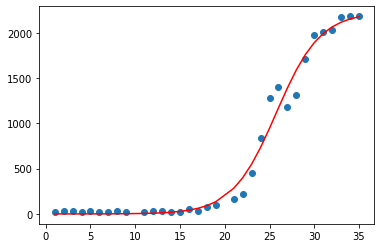

In [7]:
plt.plot(distance,amplitude, 'o')
plt.plot(distance, cauchy(distance, *popt), 'r', label='cauchy fit')
plt.show()